In [34]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# importing the actual dataset with no missing data
iris_df = pd.read_csv('iris.csv')

# importing the dataset with 10% missing values
df=pd.read_csv('iris.mis10.csv')

# column 1 was not useful. Removed it.
del df['Unnamed: 0']

# creating a copy of df with no missing values
df_new = df.dropna().copy()

In [2]:
# encoding the class into value between range 1 to n-1
from sklearn.preprocessing import LabelEncoder
# fitting the label encoder
encoder_obj = LabelEncoder()
df_new['C'] = encoder_obj.fit_transform(df_new['C'])

missing_SL = df[df['SL'].isna()].dropna(thresh=4)
missing_SW = df[df['SW'].isna()].dropna(thresh=4)
missing_PL = df[df['PL'].isna()].dropna(thresh=4)
missing_PW = df[df['PW'].isna()].dropna(thresh=4)

missing_SL['C'] = encoder_obj.transform(missing_SL['C'])
missing_SW['C'] = encoder_obj.transform(missing_SW['C'])
missing_PL['C'] = encoder_obj.transform(missing_PL['C'])
missing_PW['C'] = encoder_obj.transform(missing_PW['C'])

In [3]:
from sklearn.cluster import KMeans

In [4]:
%matplotlib notebook

In [5]:
# creating partitions of the dataset
df_label0 = df_new[df_new['C'] == 0].copy()
df_label1 = df_new[df_new['C'] == 1].copy()
df_label2 = df_new[df_new['C'] == 2].copy()

<IPython.core.display.Javascript object>


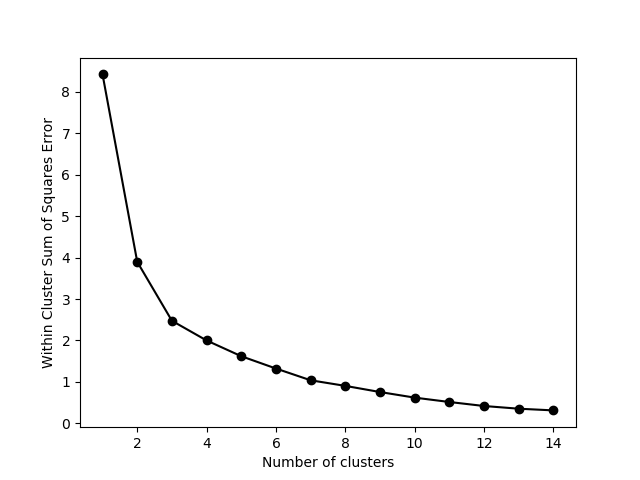

In [6]:
# Elbow method to determine optimal number of clusters for partition 1
scores =[]
for i in range(1,15):
    kmeans = KMeans(n_clusters=i,n_init=10,random_state=0)
    kmeans.fit(df_label0.iloc[:,:4])
    scores.append(kmeans.inertia_)


plt.figure()
plt.plot(np.arange(1,15),scores,'-o',c='Black')
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster Sum of Squares Error')
plt.show()

<IPython.core.display.Javascript object>


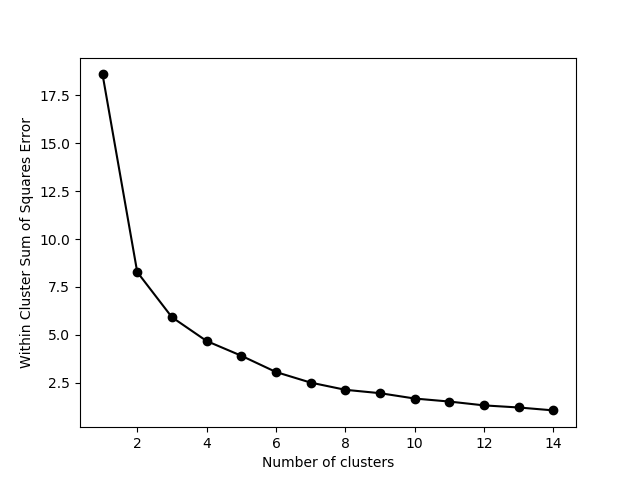

In [7]:
# Elbow method to determine optimal number of clusters for partition 2
scores =[]
for i in range(1,15):
    kmeans = KMeans(n_clusters=i,n_init=10,random_state=0)
    kmeans.fit(df_label1.iloc[:,:4])
    scores.append(kmeans.inertia_)


plt.figure()
plt.plot(np.arange(1,15),scores,'-o',c='Black')
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster Sum of Squares Error')
plt.show()

<IPython.core.display.Javascript object>


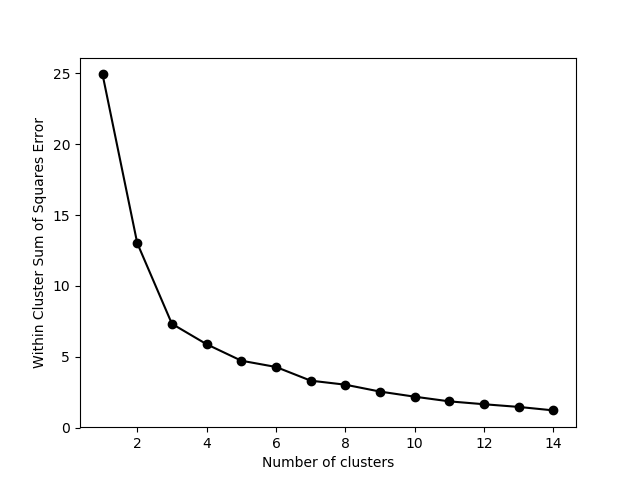

In [8]:
# Elbow method to determine optimal number of clusters for cluster 3
scores =[]
for i in range(1,15):
    kmeans = KMeans(n_clusters=i,n_init=10,random_state=0)
    kmeans.fit(df_label2.iloc[:,:4])
    scores.append(kmeans.inertia_)


plt.figure()
plt.plot(np.arange(1,15),scores,'-o',c='Black')
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster Sum of Squares Error')
plt.show()

In [9]:
# creating a kmeans object for partition 1
kmeans_obj0 = KMeans(n_clusters=3,random_state=0)
kmeans_obj0.fit(df_label0.iloc[:,:4])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [10]:
# creating a kmeans object for partition 2
kmeans_obj1 = KMeans(n_clusters=3,random_state=0)
kmeans_obj1.fit(df_label1.iloc[:,:4])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [11]:
# creating a kmeans object for partition 3
kmeans_obj2 = KMeans(n_clusters=3,random_state=0)
kmeans_obj2.fit(df_label2.iloc[:,:4])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [13]:
# storing the values of centroid coordinates in a 9x4 matrix
centroid_coords = np.zeros((9,4))
centroid_coords[:3,:] = kmeans_obj0.cluster_centers_
centroid_coords[3:6,:] = kmeans_obj1.cluster_centers_
centroid_coords[6:,:] = kmeans_obj2.cluster_centers_

In [17]:
centroid_coords

array([[5.1       , 3.54285714, 1.52142857, 0.27142857],
       [5.675     , 4.1       , 1.45      , 0.275     ],
       [4.70909091, 3.12727273, 1.41818182, 0.18181818],
       [6.34444444, 2.94444444, 4.63333333, 1.47777778],
       [5.59230769, 2.73846154, 4.09230769, 1.24615385],
       [5.        , 2.45      , 3.15      , 1.05      ],
       [5.925     , 2.68333333, 4.96666667, 1.83333333],
       [6.56666667, 3.12      , 5.57333333, 2.13333333],
       [7.6       , 2.85      , 6.425     , 2.15      ]])

In [35]:
# for each record with missing value of SL, compute eucledian distance with each cluster coordinate
# Then assign the centroid with minimum distance to that missing SL value
imputed_SL = []
for row in range(len(missing_SL.index)):
    distance = [0]*9
    for i in range(9):
        distance[i] = sum(list(map(lambda x: (x[0] - x[1])**2 , zip(centroid_coords[i,1:],missing_SL.iloc[[row],1:4].values[0]))))**0.5
    imputed_SL.append(centroid_coords[distance.index(min(distance))][0])
    print(distance.index(min(distance)))

1
0
2
2
4
7
7
7
7


In [19]:
# imputed SL values 
imputed_SL

[5.675,
 5.1,
 4.709090909090909,
 4.709090909090909,
 5.592307692307692,
 6.566666666666666,
 6.566666666666666,
 6.566666666666666,
 6.566666666666666]

In [36]:
# True SL values
iris_df.iloc[missing_SL.index,:]

,SL,SW,PL,PW,C
5,5.4,3.9,1.7,0.4,Iris-setosa
11,4.8,3.4,1.6,0.2,Iris-setosa
35,5.0,3.2,1.2,0.2,Iris-setosa
41,4.5,2.3,1.3,0.3,Iris-setosa
82,5.8,2.7,3.9,1.2,Iris-versicolor
109,7.2,3.6,6.1,2.5,Iris-virginica
128,6.4,2.8,5.6,2.1,Iris-virginica
129,7.2,3.0,5.8,1.6,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica


In [37]:
missing_SL

,SL,SW,PL,PW,C
5,NaN,3.9,1.7,0.4,0
11,NaN,3.4,1.6,0.2,0
35,NaN,3.2,1.2,0.2,0
41,NaN,2.3,1.3,0.3,0
82,NaN,2.7,3.9,1.2,1
109,NaN,3.6,6.1,2.5,2
128,NaN,2.8,5.6,2.1,2
129,NaN,3.0,5.8,1.6,2
147,NaN,3.0,5.2,2.0,2


In [21]:
imputed_SL_df = missing_SL.copy()
imputed_SL_df['SL'] = imputed_SL
imputed_SL_df

,SL,SW,PL,PW,C
5,5.675000,3.9,1.7,0.4,0
11,5.100000,3.4,1.6,0.2,0
35,4.709091,3.2,1.2,0.2,0
41,4.709091,2.3,1.3,0.3,0
82,5.592308,2.7,3.9,1.2,1
109,6.566667,3.6,6.1,2.5,2
128,6.566667,2.8,5.6,2.1,2
129,6.566667,3.0,5.8,1.6,2
147,6.566667,3.0,5.2,2.0,2


In [22]:
from sklearn.tree import DecisionTreeClassifier
dtree_clf = DecisionTreeClassifier(random_state=0)
dtree_clf.fit(iris_df.iloc[:,:4],encoder_obj.transform(iris_df.iloc[:,[4]]))

/home/cyberworm/miniconda3/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [31]:
dtree_clf.predict(imputed_SL_df.iloc[:,:4])

array([0, 0, 0, 0, 1, 2, 2, 2, 2])

In [33]:
missing_SL['C'].values

array([0, 0, 0, 0, 1, 2, 2, 2, 2])

<IPython.core.display.Javascript object>


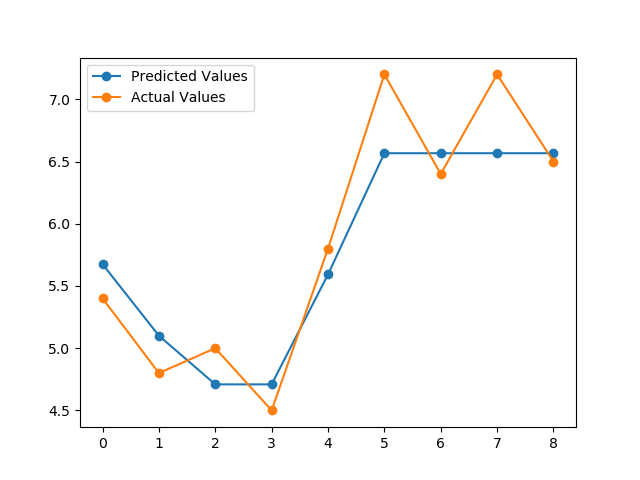

In [23]:
plt.figure()
plt.plot(np.arange(len(imputed_SL)),imputed_SL, '-o',label='Predicted Values')
plt.plot(np.arange(len(imputed_SL)),iris_df.iloc[missing_SL.index,[0]].values, '-o',label = 'Actual Values')
plt.legend()
plt.show()

In [24]:
imputed_PW = []
for row in range(len(missing_PW.index)):
    distance = [0]*9
    for i in range(9):
        distance[i] = sum(list(map(lambda x: (x[0] - x[1])**2 , zip(centroid_coords[i,:3],missing_PW.iloc[[row],:3].values[0]))))**0.5
    imputed_PW.append(centroid_coords[distance.index(min(distance))][3])

In [25]:
imputed_PW

[0.18181818181818182,
 0.18181818181818182,
 2.1333333333333333,
 2.1333333333333333]

In [26]:
missing_PW

,SL,SW,PL,PW,C
3,4.6,3.1,1.5,NaN,0
29,4.7,3.2,1.6,NaN,0
104,6.5,3.0,5.8,NaN,2
145,6.7,3.0,5.2,NaN,2


In [27]:
iris_df.iloc[missing_PW.index,:]

,SL,SW,PL,PW,C
3,4.6,3.1,1.5,0.2,Iris-setosa
29,4.7,3.2,1.6,0.2,Iris-setosa
104,6.5,3.0,5.8,2.2,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
